# Time Series Forecasting using Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gold_monthly_csv.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
df.shape

(847, 2)

In [4]:
print(f'Date range of gold prices available from {df.loc[:, 'Date'][0]} to {df.loc[:, "Date"].iloc[-1]}')

Date range of gold prices available from 1950-01 to 2020-07


In [5]:
date = pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [6]:
df['month'] = date
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


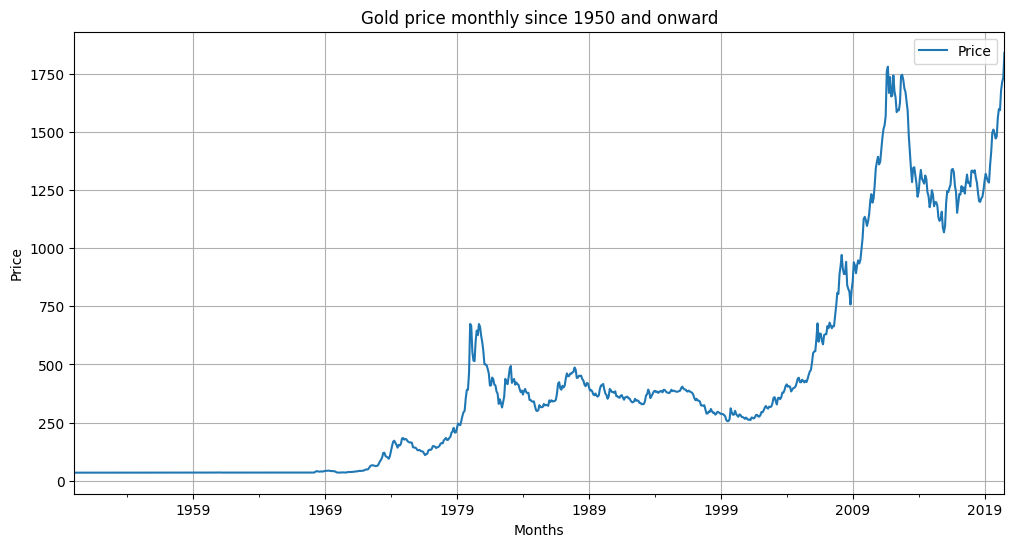

In [7]:
df.plot(figsize=(12, 6))
plt.title('Gold price monthly since 1950 and onward')
plt.xlabel('Months')
plt.ylabel('Price')
plt.grid()

In [8]:
round(df.describe(), 3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


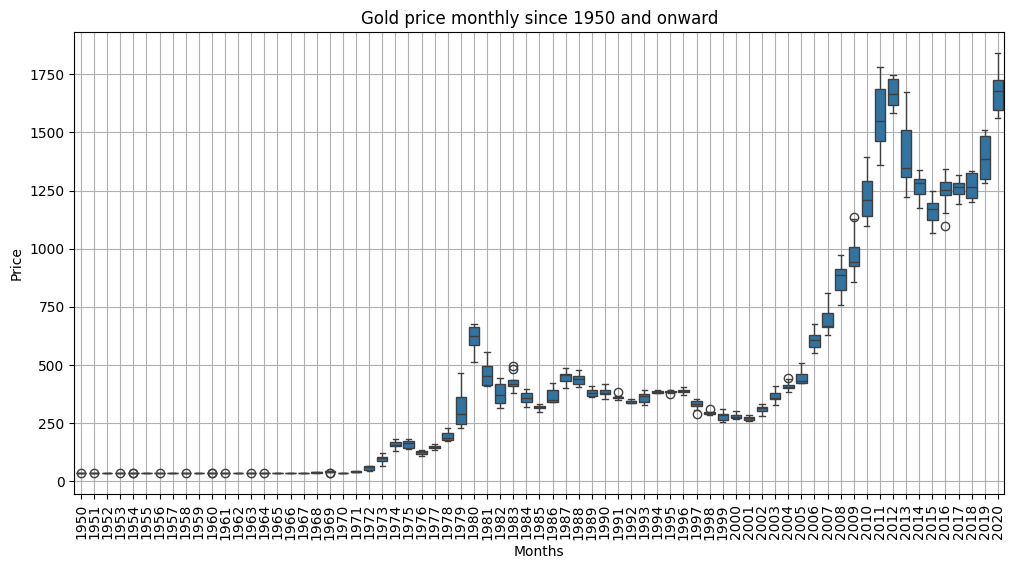

In [9]:
_, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x = df.index.year, y=df['Price'], ax=ax)
plt.title('Gold price monthly since 1950 and onward')
plt.xlabel('Months')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()

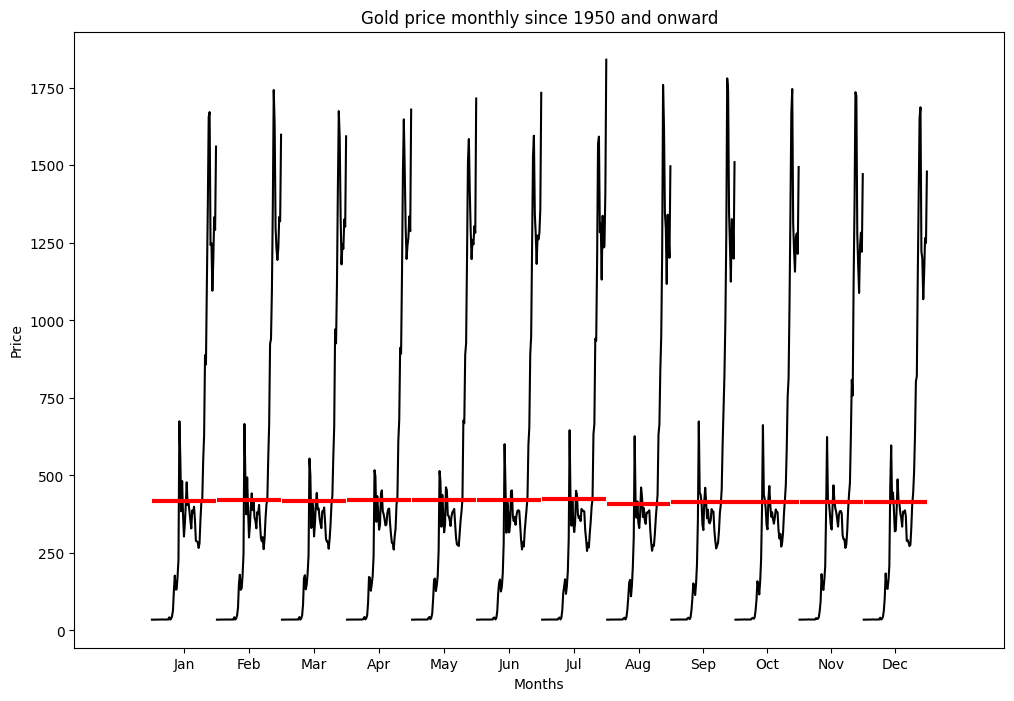

In [10]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(12, 8))
month_plot(df, ylabel = 'Gold Price', ax=ax)
plt.title('Gold price monthly since 1950 and onward')
plt.xlabel('Months')
plt.ylabel('Price')
plt.show()

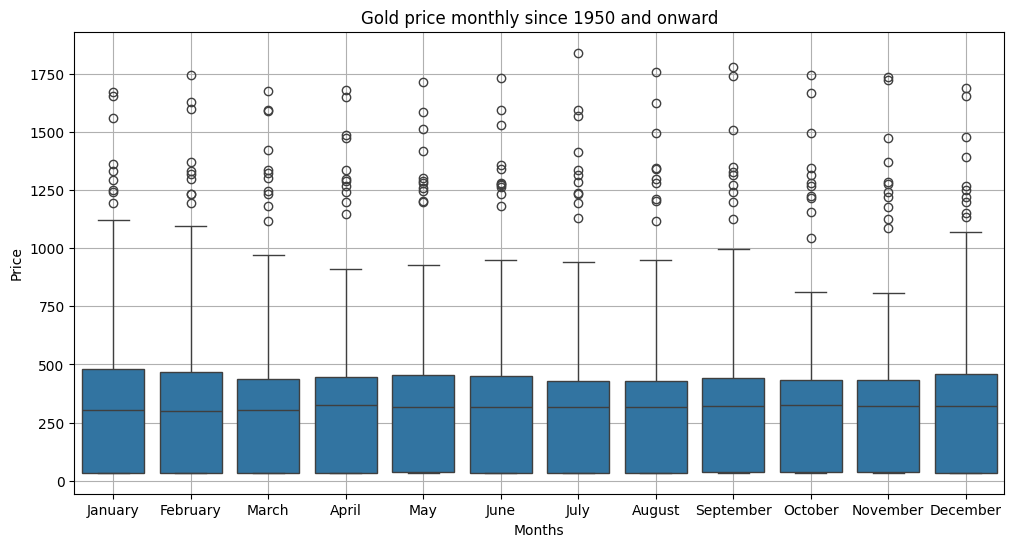

In [11]:
_, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title('Gold price monthly since 1950 and onward')
plt.xlabel('Months')
plt.ylabel('Price')
plt.grid()

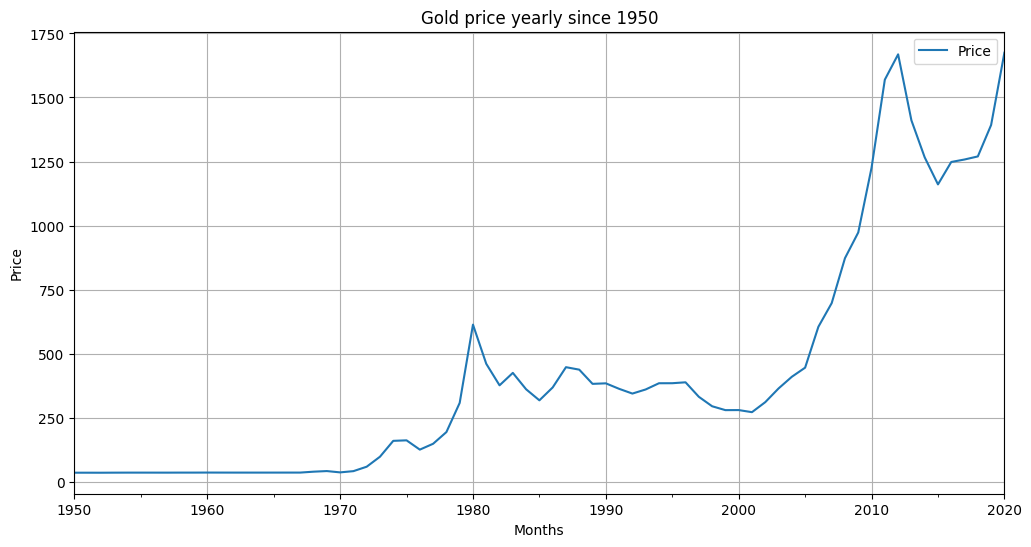

In [12]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot(figsize=(12, 6))
plt.title('Gold price yearly since 1950')
plt.xlabel('Months')
plt.ylabel('Price')
plt.grid()

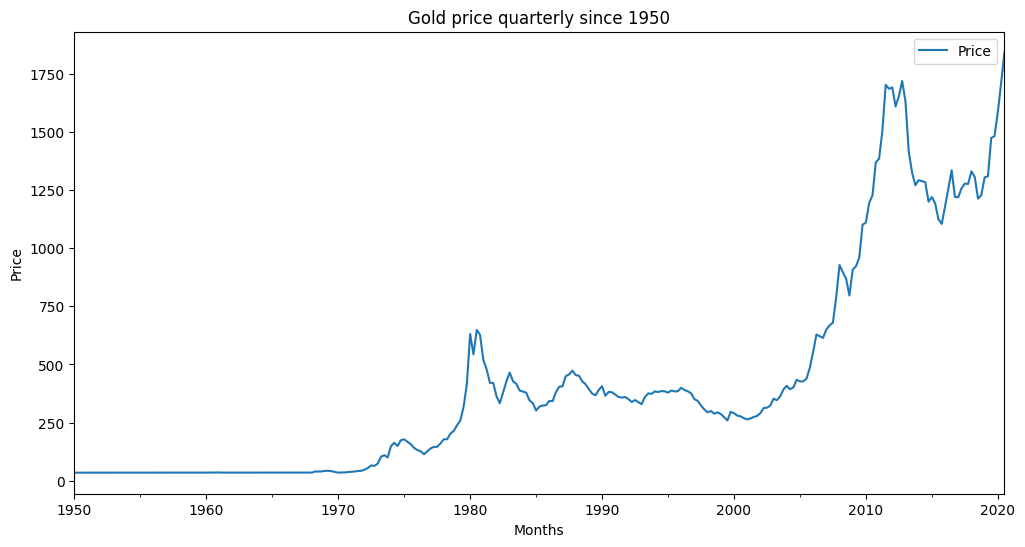

In [13]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot(figsize=(12, 6))
plt.title('Gold price quarterly since 1950')
plt.xlabel('Months')
plt.ylabel('Price')
plt.show()

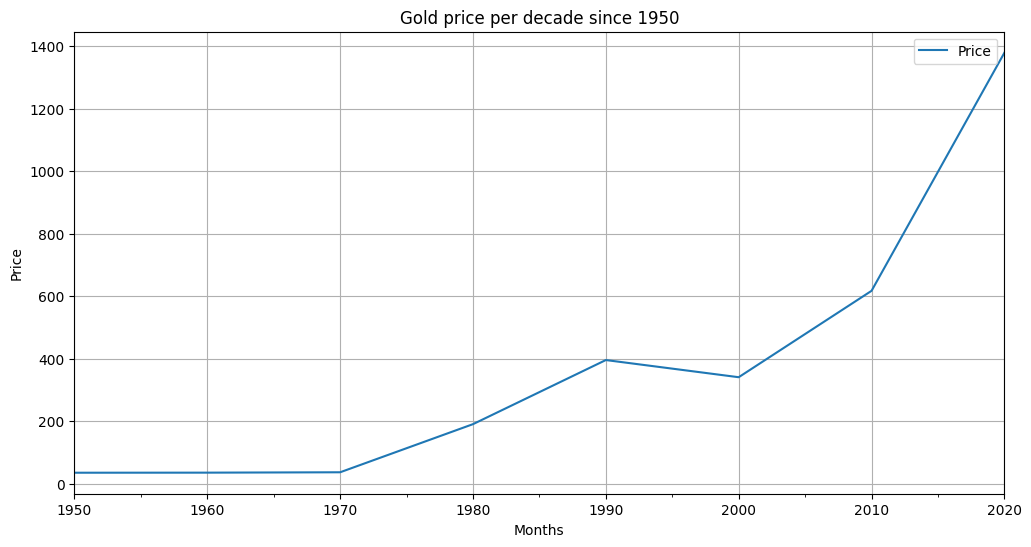

In [14]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot(figsize=(12, 6))
plt.title('Gold price per decade since 1950')
plt.xlabel('Months')
plt.ylabel('Price')
plt.grid()

In [15]:
df1 = df.groupby(df.index.year).mean().rename(columns={'Price': 'Mean'})
df1 = df1.merge(df.groupby(df.index.year).std().rename(columns={'Price': 'Std'}), left_index=True, right_index=True)
df1['Cov_pct'] = ((df1['Std'] / df1['Mean']) * 100).round(2)
df1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


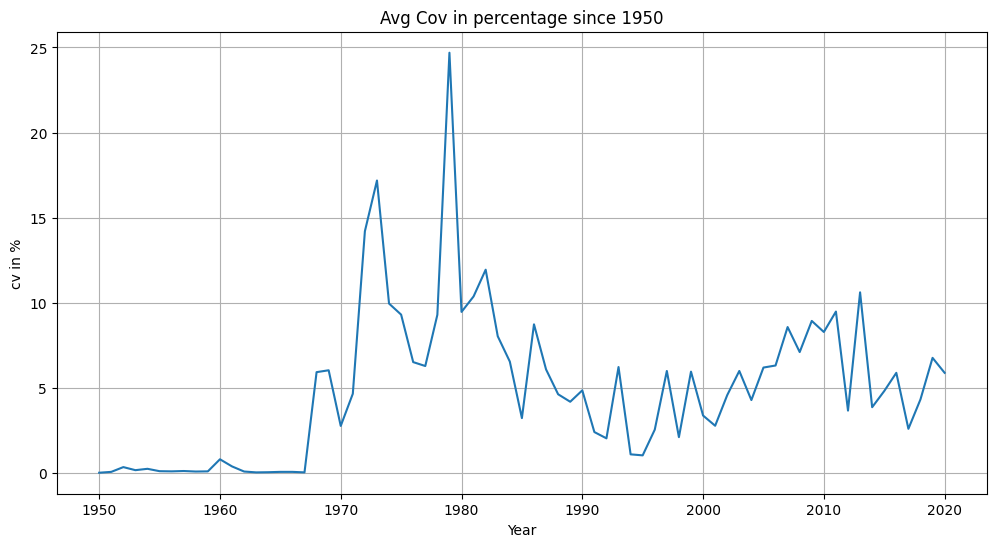

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
df1['Cov_pct'].plot()
plt.title("Avg Cov in percentage since 1950")
plt.xlabel("Year")
plt.ylabel('cv in %')
plt.grid()

In [17]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]


In [18]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


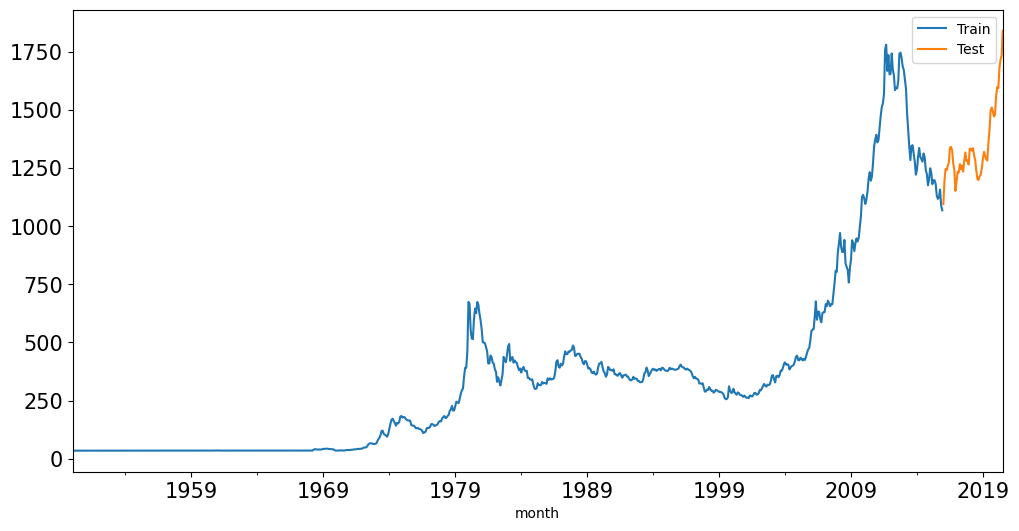

In [19]:
train['Price'].plot(figsize=(12, 6), fontsize=15)
test['Price'].plot(figsize=(12, 6), fontsize=15)
plt.grid()
plt.legend(['Train', 'Test'])
plt.grid()

In [20]:
train_time = [i + 1 for i in range(len(train))]
test_time = [i + len(train) + 1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [21]:
LR_train = train.copy()
LR_test = test.copy()

In [22]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [33]:
lr = LinearRegression()
lr.fit  (LR_train[['time']], LR_train['Price'].values)


LinearRegression()

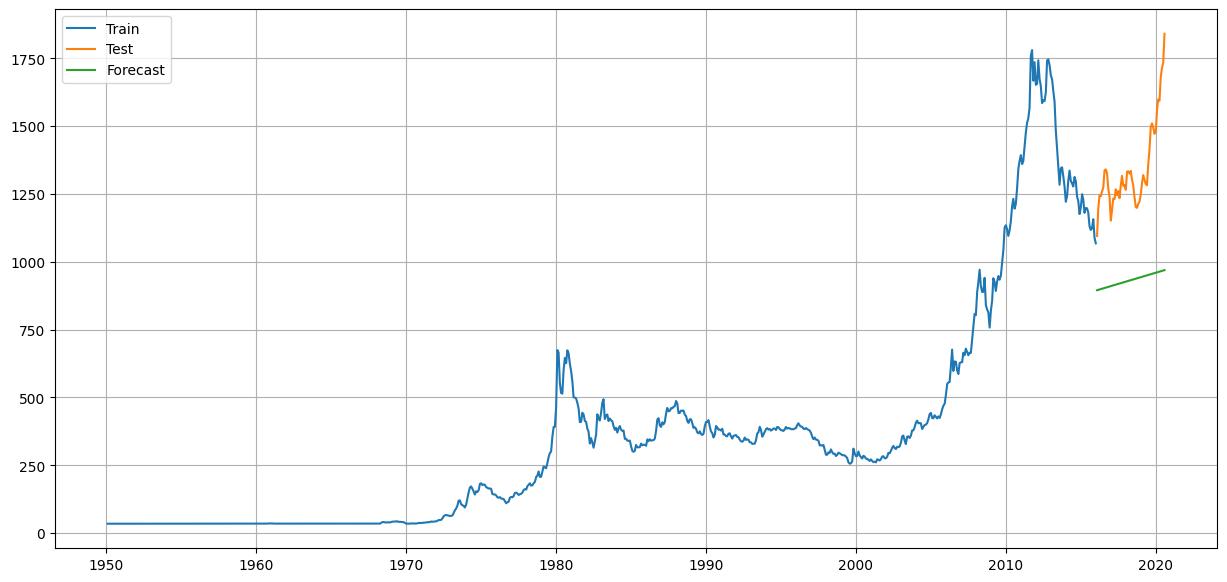

In [34]:
test_prediction_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_prediction_model1


plt.figure(figsize = (15, 7))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(LR_test['forecast'], label = 'Forecast')
plt.legend(loc='best')
plt.grid()

In [35]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred) / actual)) ** 100, 2)

In [36]:
mape_model1_test = map(test['Price'].values, test_prediction_model1)
print('Mape is %3.3f'%(mape_model1_test), '%')

Mape is 0.000 %


In [37]:
results = pd.DataFrame({'Test mape %': mape_model1_test}, index=['Linear Regression'])
results

,Test mape %
Linear Regression,0.0
